
## BME i9400
## Fall 2024
### Regularization and Cross-Validation



## Motivation for regularization
- **Overfitting** occurs when a model learns the **noise** in the training data, instead of the underlying pattern.
    - Overfitting is more likely to happen when we have either limited data, an overly complex model, or both
- Remember that we would like the number of examples to be much larger than the number of features (e.g. 10x or more)



## Occam's Razor
- "Entities should not be multiplied without necessity." - William of Ockham
- Simpler models are often preferred over more complex ones, as they generalize better.
[William of Ockham, 1287-1347](ockham.jpg)

## Regularization
- Regularization is the process of discouraging complex solutions in training of machine learning models
- How can we quantify the complexity of a model?
- How can we force the model to be simple?
- Recall that training occurs by minimizing a loss function on some training examples $(x,y)$

## Regularization (cont'd)
- Regularization attempts to prevent overfitting by adding a **penalty** term to the loss function
---
<centers> $L^{\mathrm{reg}}(w) = L(w) + \lambda \cdot \text{Penalty}(w)$ </center>

---
- where $\lambda$ is a hyperparameter that controls the strength of the regularization
- and $L(w)$ is the original loss function
- and $\text{Penalty}(w)$ is the regularization term
- Instead of simply fitting the model to the data, the model now must also balance the penalty term


## Review: Loss Function for Linear Regression
- The loss function for linear regression is based on minimizing the sum of squared errors:
---
### $L(w) = ||y - Xw||^2$
---
- The goal is to find the weight vector $w$ that projects the features $X$ onto a line such that the projections approximate the target values $y$ as closely as possible.



## Ridge Regression (L2 Regularization)
- Ridge regression is a modification of linear regression that penalizes large weights
    - Why do we want to penalize large weights?
- The L2 norm of vector $x$ is $\sqrt{\Sigma_i x_i^2}$
- The loss function for ridge regression is:
---
### $L(w) = ||y - Xw||^2 + \lambda ||w||^2$
---


## Ridge Regression (cont'd)
- Let's take the derivative of this loss function and set it to zero to find the optimal weights $w$.
---
### $\frac{\partial L(w)}{\partial w} = -2X^T(y - Xw) + 2\lambda w = 0$

---
- Setting to zero and solving for $w$ (try it out!) gives:
---
$w = (X^TX + \lambda I)^{-1}X^Ty$

---

- Remember that the unregularized least squares solution is:
---
$w = (X^T X)^{-1}X^Ty$

---

## Example of Ridge Regression
Let's fit a ridge regression model to some synthetic data.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Let's generate some synthetic data according to a third order polynomial
- We will add noise to the observations
- We will then attempt to fit a model whose degree overfits the data

In [ ]:
n_obs = 30 # the number of observations (keep this small to simulate overfitting)
noise_std = 10 # the standard deviation of the noise (i.e., noise power)
model_order = 10 # the order of the polynomial model that we will try to fit

# set the numpy random seed
np.random.seed(42)

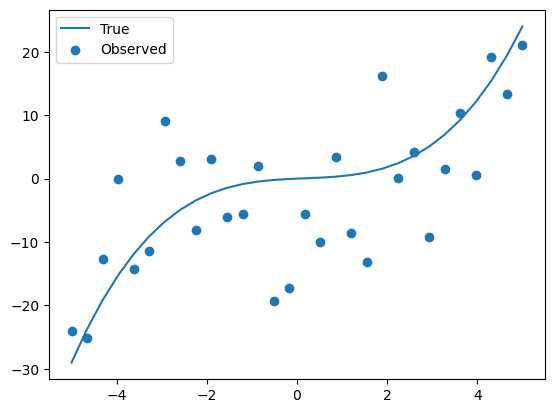

In [3]:
x = np.linspace(-5, 5, n_obs)
y_true = 0.2*(x**3) - 0.1*(x**2) + 0.3*x # the true function: 0.2 x^3 - 0.1 x^2 + 0.3 x
noise = np.random.normal(0, noise_std, n_obs)
y = y_true + noise

plt.plot(x, y_true, label='True')
plt.scatter(x, y, label='Observed')
plt.legend()

## Let's try to fit a 10th order polynomial to the data
- We will use the pseudo-inverse to compute the optimal weights
- The regression coefficients should be zero abover order 3

In [11]:
X = np.column_stack([x**i for i in range(model_order+1)])

# print out the first four rows of X
print("The shape of X is:", X.shape)

#X[0:4,-1], x[0:4]**10

The shape of X is: (30, 11)


(array([9765625.        , 4779227.519074  , 2213707.0649102 ,
         961608.79003028]),
 array([9765625.        , 4779227.519074  , 2213707.0649102 ,
         961608.79003028]))

In [12]:
# X * w = y
# w = X^-1 * y      --> except that here X is not square, so we need to use the pseudo-inverse

pinvX = np.linalg.inv(X.T @ X) @ X.T # this is equivalent to np.linalg.pinv(X)
w = pinvX @ y # compute the optimal weights (these minimize the squared error!)
y_hat = X @ w # compute the predicted values (ooo weee!)

for i in range(model_order+1):
    print(f'w_{i} = {w[i]:.3f}')

w_0 = -12.364
w_1 = 2.050
w_2 = 8.581
w_3 = -0.579
w_4 = -1.920
w_5 = 0.050
w_6 = 0.180
w_7 = -0.001
w_8 = -0.007
w_9 = -0.000
w_10 = 0.000


## Let's plot both the true (i.e., noise-free) and the fitted values

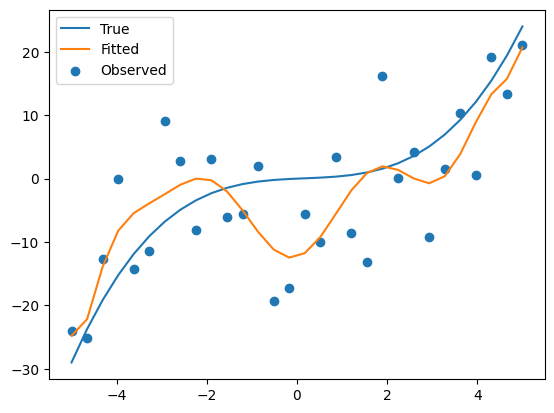

In [15]:
plt.plot(x, y_true, label='True')
plt.plot(x, y_hat, label='Fitted')
plt.scatter(x, y, label='Observed')
plt.legend()

### Q: What is the reason for the oscillations in the fitted curve?

## Add some regularization to the model
- We need to initialize our regularization parameter
    - Let's set it to 10 for now
- Tuning the value of this hyperparameter is critical for mitigating overfitting

In [28]:
lam = 1e3
w_ridge = np.linalg.inv( X.T@X + lam*np.eye(model_order+1) )  @ X.T @ y

for i in range(model_order+1):
    print(f'Regularized: w_{i} = {w_ridge[i]:.4f}, Non-regularized: w_{i} = {w[i]:.4f}')

Regularized: w_0 = -0.0630, Non-regularized: w_0 = -12.3640
Regularized: w_1 = 0.0151, Non-regularized: w_1 = 2.0498
Regularized: w_2 = -0.0243, Non-regularized: w_2 = 8.5806
Regularized: w_3 = 0.0205, Non-regularized: w_3 = -0.5790
Regularized: w_4 = -0.0335, Non-regularized: w_4 = -1.9203
Regularized: w_5 = -0.0097, Non-regularized: w_5 = 0.0495
Regularized: w_6 = 0.0057, Non-regularized: w_6 = 0.1795
Regularized: w_7 = 0.0018, Non-regularized: w_7 = -0.0006
Regularized: w_8 = -0.0003, Non-regularized: w_8 = -0.0074
Regularized: w_9 = -0.0000, Non-regularized: w_9 = -0.0000
Regularized: w_10 = 0.0000, Non-regularized: w_10 = 0.0001


### Q: What do you notice about the magnitude of the regularized weights?

## Compare the regularized model fits with the original model

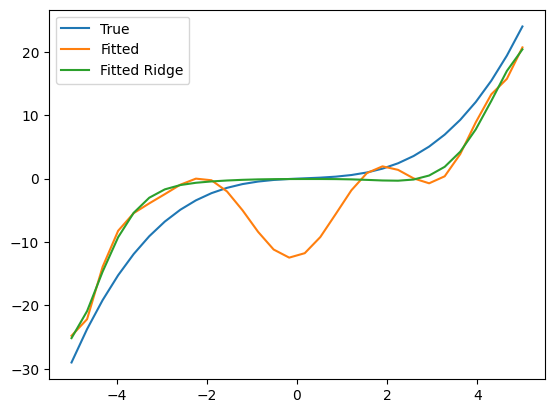

In [29]:
y_hat_ridge = X @ w_ridge
plt.plot(x, y_true, label='True')
plt.plot(x, y_hat, label='Fitted')
plt.plot(x, y_hat_ridge, label='Fitted Ridge')
plt.legend()

### Increasing $\lambda$ may produce even better results


## Review: Loss Function for Logistic Regression
- The loss function for logistic regression is the cross-entropy loss:
---
### $L(w) = -\sum [y \log(\hat{p}) + (1 - y) \log(1 - \hat{p})]$
---
- Here, $\hat{p}$ is the predicted probability of the positive class.



## L2 Regularization in Logistic Regression
- The regularized logistic regression loss function is:
---
### $L(w) = -\sum [y \log(\hat{p}) + (1 - y) \log(1 - \hat{p})] + \lambda ||w||^2$
---
- The penalty term will shrink the classifier weights depending on the value of $\lambda$.


## L1 regularization (Sparsity)
- The L2 penalty ($||w||^2$) encourages weights to be small but allows them to be distributed across all features.
- It would be convenient to have the irrelevant features have *zero* weight, and have the important features not be shrunk at all
- This is the essence of so-called L1 regularization
- The term "sparse" is used to describe a vector that has many zero entries


## L1 Penalty
- The "L1 norm" of a vector is defined as the sum of the absolute values of the weights:
---
$||w||_1 = \sum |w_i|$

---
- The L1 penalty term becomes $\lambda ||w||_1$
- The L1 penalty ($||w||_1$) encourages sparsity, leading to fewer non-zero weights.
- Why does minimizing the sum of absolute values lead to sparsity?

## Contours of the L1 penalty
- Plotting the L1 norm of a two-dimensional vector gives us insight into what L1 regularization does
- We will compare the L1 norm to the L2 norm

Text(0.5, 1.0, 'Contour Plot of Y grid')

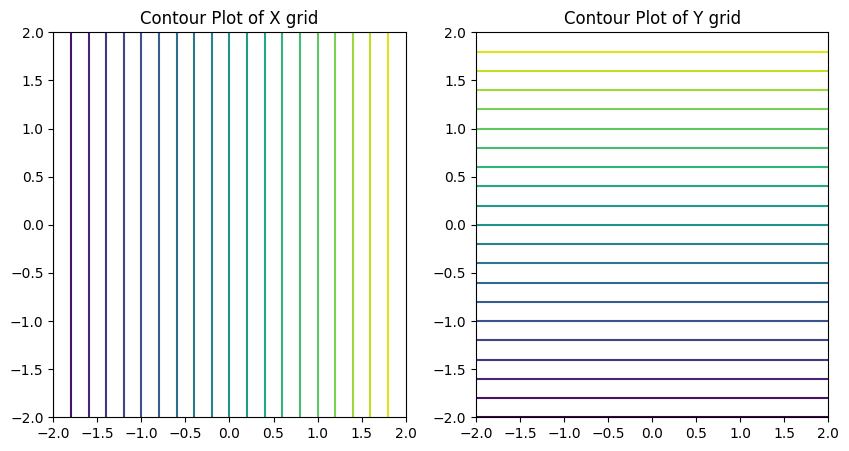

In [31]:
# Generate the 2-d grid of coordinates
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# plot X and Y separately to illustrate the concept of meshgrid to the students
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].contour(X, Y, X, levels=20, cmap='viridis')
ax[0].set_title('Contour Plot of X grid')
ax[1].contour(X, Y, Y, levels=20, cmap='viridis')
ax[1].set_title('Contour Plot of Y grid')


In [32]:
# Calculate the L2 penalty
Z2 = np.sqrt( X**2 + Y**2 )

# Calculate the L1 penalty
Z1 = np.abs(X) + np.abs(Y)

Text(0, 0.5, 'w2')

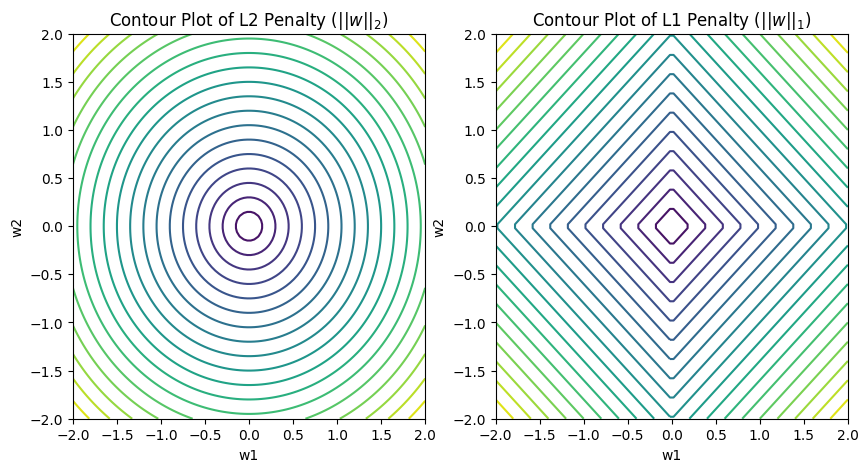

In [33]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].contour(X, Y, Z2, levels=20, cmap='viridis')
ax[0].set_title('Contour Plot of L2 Penalty ($||w||_2$)')
ax[0].set_xlabel('w1')
ax[0].set_ylabel('w2')

ax[1].contour(X, Y, Z1, levels=20, cmap='viridis')
ax[1].set_title('Contour Plot of L1 Penalty ($||w||_1$)')
ax[1].set_xlabel('w1')
ax[1].set_ylabel('w2')

### Q: How does the shape of the L1 penalty promote sparsity?


## L1 Regularization in Logistic Regression
- In the context of logistic regression, the loss function with L1 regularization is:
---
### $L(w) = -\sum [y \log(\hat{p}) + (1 - y) \log(1 - \hat{p})] + \lambda ||w||_1$
---
- Encourages sparsity in the model weights (**feature selection**).


## Example: L1 Regularization in Logistic Regression
- We will work with the breast cancer dataset from last lecture
- We will truncate the dataset to make the problem more challenging

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [36]:
data = load_breast_cancer()
X = data['data']
y = data['target']

## truncate the dataset size to make the problem more challenging
X = X[:200]
y = y[:200]

## Fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Fitting regularized logistic regression
- To fit the L1 regularized logistic regression model, we can use the same `LogisticRegression` class as before, but now we will have to add an additional parameter `penalty='l1'`
- For comparison, we will also fit a logistic regression model with no regularization

In [39]:
## Create a logistic regression model with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='saga', C=0.01, max_iter=10000) # C is a hyperparameter that controls the strength of the regularization (here smaller means stronger regularization, which is unconventional)

## For comparison, let's also create a model with no regularization
model = LogisticRegression(penalty=None, solver='saga', max_iter=10000) #

## Fit both models
model_l1.fit(X_train, y_train)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty=None, solver='saga')

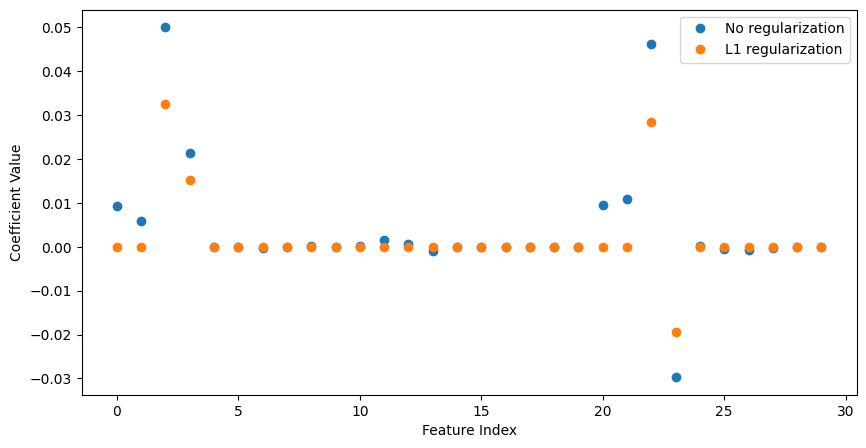

In [40]:
## Let's plot both sets of coefficients
plt.figure(figsize=(10,5))
plt.plot(model.coef_.T, 'o', label='No regularization')
plt.plot(model_l1.coef_.T, 'o', label='L1 regularization')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()

### What do you notice about features 20 and 21?

## Comparing classification performance

In [41]:
## Create predictions
y_pred = model.predict(X_test)
y_pred_l1 = model_l1.predict(X_test)

## Compute the accuracy
acc = np.mean(y_pred == y_test)
acc_l1 = np.mean(y_pred_l1 == y_test)

print(f'Accuracy without regularization: {acc:.3f}')
print(f'Accuracy with L1 regularization: {acc_l1:.3f}')

Accuracy without regularization: 0.920
Accuracy with L1 regularization: 0.920



## Motivation for Cross-Validation
- We have seen that a dataset needs to be split into training and test sets to assess generalization of a model
- This means that some of the data is only used to evaluate performance (i.e., not to fit the model)
- Ideally, we would like to use all of the available data to fit our models, but we also need to assess generalization
- **Cross-validation** is a strategy to efficiently use data for training and validation
- It is particularly useful when we have limited data, and helps to mitigate overfitting



## K-Fold Cross-Validation
- Split the data into $K$ subsets (folds)
- Train the model on $K-1$ folds and validate on the remaining fold
- Repeat this process $K$ times, each time using a different fold for validation
- The final performance is the average of the $K$ validation scores


## Leave-One-Out Cross-Validation (LOOCV)
- A special case of K-Fold where $k$ equals the number of samples.
- Each sample is used once as a validation set.
- Note that the performance here is deterministic (i.e., no randomness when selecting the folds)
- Impractical for large datasets


## Demonstrating K-Fold Cross-Validation
- We will again use the breast cancer dataset

In [43]:
data = load_breast_cancer()
X = data['data']
y = data['target']

X.shape, y.shape

((569, 30), (569,))

## Partition the data into 5 folds
- We will assign an integer index to each fold between 0 and 4
- We will then use this index to partition the data

In [54]:
n_examples = X.shape[0]
n_folds = 20
fold_idx = np.random.permutation(n_examples) % n_folds

{ i: np.sum(fold_idx==i) for i in range(n_folds) }

{0: np.int64(29),
 1: np.int64(29),
 2: np.int64(29),
 3: np.int64(29),
 4: np.int64(29),
 5: np.int64(29),
 6: np.int64(29),
 7: np.int64(29),
 8: np.int64(29),
 9: np.int64(28),
 10: np.int64(28),
 11: np.int64(28),
 12: np.int64(28),
 13: np.int64(28),
 14: np.int64(28),
 15: np.int64(28),
 16: np.int64(28),
 17: np.int64(28),
 18: np.int64(28),
 19: np.int64(28)}

## Implementing K-Fold Cross-Validation
- We will loop over the folds, training a logistic regression model on all but the current fold
- We will then evaluate the model on the current fold
- We will store the accuracy for each fold

In [55]:
# Create a list that will store the accuracy for each fold
fold_accuracy = []

for fold in range(n_folds):
    
    # define the training set and the test set for this fold
    X_train = X[fold_idx != fold]
    y_train = y[fold_idx != fold]
    
    X_test = X[fold_idx == fold]
    y_test = y[fold_idx == fold]
    
    # fit the model for this fold
    model = LogisticRegression(solver='saga', max_iter = 10000)
    model.fit(X_train, y_train)
    
    y_hat = model.predict(X_test)
    
    acc = np.mean(y_hat == y_test)
    
    fold_accuracy.append(acc)
    
    print(f'Fold {fold}: Accuracy = {acc:.3f}')

Fold 0: Accuracy = 0.966
Fold 1: Accuracy = 0.862
Fold 2: Accuracy = 0.966
Fold 3: Accuracy = 1.000
Fold 4: Accuracy = 0.897
Fold 5: Accuracy = 0.931
Fold 6: Accuracy = 0.931
Fold 7: Accuracy = 0.931
Fold 8: Accuracy = 0.966
Fold 9: Accuracy = 1.000
Fold 10: Accuracy = 0.929
Fold 11: Accuracy = 0.929
Fold 12: Accuracy = 0.821
Fold 13: Accuracy = 0.857
Fold 14: Accuracy = 0.929
Fold 15: Accuracy = 0.929
Fold 16: Accuracy = 0.857
Fold 17: Accuracy = 0.857
Fold 18: Accuracy = 1.000
Fold 19: Accuracy = 0.893


In [56]:
## Compute the average accuracy
avg_acc = np.mean(fold_accuracy)
print(f'Average Accuracy: {avg_acc:.3f}')

Average Accuracy: 0.922
